<a href="https://colab.research.google.com/github/staaason/Labs_crypto/blob/main/%5Clab1%5CLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
import statistics
import string
import matplotlib.pyplot as plt
import random
import re
from collections import Counter
import statistics

**Завдання 1.** Побудуйте гiстограму частот появи лiтер в текстi.


dict_items([('І', 0.057509952617025295), ('Н', 0.0702258068717262), ('С', 0.04151097007043946), ('П', 0.02973277853396025), ('Е', 0.05189157516158835), ('К', 0.03406823013790528), ('Т', 0.04949389429417455), ('О', 0.09801955450529234), ('Р', 0.045400511800160526), ('Ч', 0.013951652502452411), ('Я', 0.02296907238193993), ('Щ', 0.006033696299094225), ('В', 0.05836609541244837), ('А', 0.08253145674340637), ('М', 0.033199349833920096), ('Х', 0.009883748000912318), ('Ь', 0.013365608957461283), ('Ж', 0.00755741081358867), ('Ф', 0.0027569502541220756), ('Г', 0.01589578619972634), ('З', 0.02314488723103664), ('Ш', 0.008655604989473632), ('У', 0.0342096434849667), ('Ц', 0.00820205692977556), ('Л', 0.0399579564520175), ('И', 0.05950887610582537), ('Й', 0.012506927406969709), ('Д', 0.033610853267612276), ('Ю', 0.008570245175135134), ('Б', 0.015119920371260353), ('Є', 0.00450488762240974), ('Ї', 0.00565913902722487), ('Ґ', 0.0019861745542300658)])


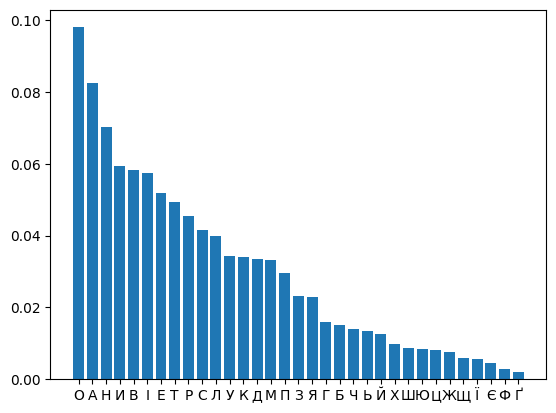

In [4]:
def count_letters(files):
  frequency = {}
  for file_path in files:
    with open(file_path, 'r', encoding='utf-8') as file:
      content = file.read()
      letters = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]','',content.upper())
      total_letters = len(letters)
    for letter in letters:
      if letter in frequency:
        frequency[letter] += 1
      else:
        frequency[letter] = 1
    for letter in frequency:
      frequency[letter] /= total_letters
  print(frequency.items())
  return sorted(frequency.items(), key=lambda x: x[1], reverse=True)
print()
files_path = ['book1.txt', 'book2.txt', 'book3.txt', 'book4.txt']
frequency = count_letters(files_path)
plt.bar([x[0] for x in frequency], [x[1] for x in frequency])
plt.show()

Відповідно до цієї діаграми, що взята з habr  видно, що діаграми майже ідентичні, якщо взяти більше даних


**Завдання 2.** Реалiзуйте алгоритм шифрування Вiженера.

In [5]:

def vigenere_encrypt(plaintext, key):
    if(plaintext.isalpha):
        alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.upper()
        key = key.upper()
    else:
        alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.lower()
        key = key.lower()
    
    n = len(alphabet)
    k = len(key)
    ciphertext = ''
    for i in range(len(plaintext)):
        pi = alphabet.find(plaintext[i])
        ki = alphabet.find(key[i % k])
        ci = (pi + ki) % n
        ciphertext += alphabet[ci]
    return ciphertext


def vigenere_decrypt(ciphertext, key):
    alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'
    if ciphertext.isalpha():
        ciphertext = ciphertext.lower()
        key = key.lower()
        alphabet = alphabet.lower()
    elif not set(ciphertext).issubset(set(alphabet)):
        print(set(ciphertext))
        print(set(alphabet))
        raise ValueError("Ciphertext contains characters not in the alphabet")

    key_len = len(key)
    new_key = (key * (len(ciphertext) // key_len + 1))[:len(ciphertext)]
    plaintext = ''
    for i in range(len(ciphertext)):
        k = alphabet.index(new_key[i])
        c = alphabet.index(ciphertext[i])
        p = (c - k) % len(alphabet)
        plaintext += alphabet[p]
    return plaintext


def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation + '0123456789')
    text = text.translate(translator)
    text = text.replace(' ', '')
    return ''.join(ch for ch in text if ch.isalnum()).lower()


plain_text = "СЛАВАУКРАЇНІ"
fixed_text = remove_punctuation(plain_text)
plaintext = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]', '', fixed_text.upper(), flags=re.U)
key = "веснакрасналюбить".upper()
cipher_text = vigenere_encrypt(plaintext, key)
print(cipher_text)
decrypted_text = vigenere_decrypt(cipher_text, key).upper()
print(decrypted_text)
print(fixed_text.upper() == decrypted_text)

with open('book2.txt', 'r', encoding='utf-8') as file:
    plain_text = file.read(1000)
    letters = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]','',plain_text.upper())
plaintext = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]', '', plain_text.upper(), flags=re.U)
cipher_text = vigenere_encrypt(plaintext, key)




УССПАҐБРСЩНЦ
СЛАВАУКРАЇНІ
True


**Завдання 3** Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований крипто-
текст, не знаючи секретного ключа

Для виконання завдання нам потрібно використати index of coincidence , щоб перевірити на схожість тексту.    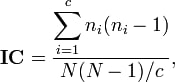, де N — це довжина тексту, а від n_1 до n_c — частоти (як цілі числа) c літер алфавіту (у нашому випадку 33 з букви з українського алфавіту). Далі потрібно порахувати потенційні можливі довжини ключа за допомогою IOC. Визначивши можливі довжини ключа(періода) потрібно зламати тепер відповідну кількість до періода шифрів Цезаря. Для цього потрібно використати статистику хі-квадрат, яка порівняє розподіл частот  послідовностей з очікуваним розподілом частот з українського алфавіту.
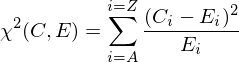

Це дозволяє порівняти кількість літер у кожному розшифруванні з тим, що ми могли б очікувати, якби текст був українським. Обчисливши статистику хі-квадрат для зашифрованого тексту, що дає можливість побачити частоту зустрічі букв.Цю прогонку треба виконати для інших літер, а потім додати 33 результатів(кількість букв в алфавіті), які отримали. В результаті ми отримаємо значення статистики. Щоб знайти правильний ключ, ми повинні зробити це для кожного можливого ключа. Але найнижче значення статистики може не відповідати правильності розшифрованого повідомлення.

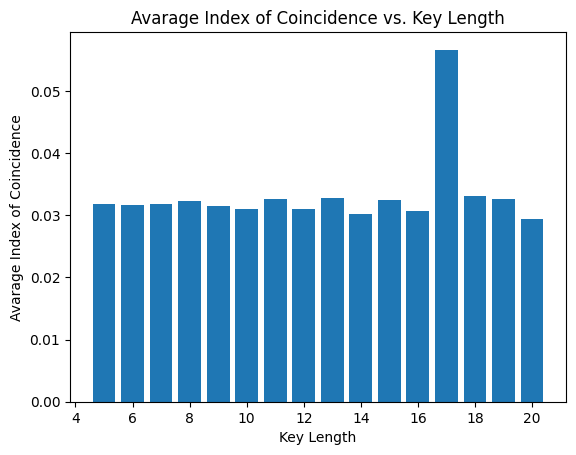

{17: 0.05666503419128984, 18: 0.033155847884530056, 13: 0.032799088801204086, 11: 0.03265873085475632, 19: 0.03262125819369751}


In [6]:
'''
This function takes in a string of text and calculates its Index of Coincidence (IOC), 
which is a measure of how similar the frequencies of letters 
in the text are to the frequencies of letters in a typical language.
'''
def index_of_coincidence(text):
    n = len(text)
    frequencies = Counter(text)
    return sum([i*(i-1) for i in list(frequencies.values())])/(n*(n-1))

'''
 This function takes in a string of text and an integer n, and returns a list 
 of substrings of the text, where each substring consists of every nth character 
 starting from the first, second, ..., nth character, respectively. 
'''
def get_substrings_by_stride(string, n):
    new = [''] * n
    for i, char in enumerate(string):
        new[i % n] += char
    return [s.strip() for s in new]



'''
  The function works by iterating over all potential key lengths 
  in the range [min_length, max_length],
  getting the substrings for each key length, and then computing 
  the average IOC for those substrings. The resulting dictionary maps each 
  potential key length to its average IOC value.
'''
def get_potential_key_lengths(text, min_length=5, max_length=20):
    ioc_dict = {}
    for stride in range(min_length, max_length+1):
        substrings = get_substrings_by_stride(text, stride)
        ioc = sum([index_of_coincidence(s) for s in substrings])/stride
        ioc_dict[stride] = ioc
    return ioc_dict
ioc_dict = get_potential_key_lengths(cipher_text)
plt.bar(ioc_dict.keys(), ioc_dict.values())
plt.xlabel('Key Length')
plt.ylabel('Avarage Index of Coincidence')
plt.title('Avarage Index of Coincidence vs. Key Length')
plt.show()
top_lengths_iocs = {k: v for k, v in sorted(ioc_dict.items(), key=lambda x: x[1], reverse=True)[:5]}
print(top_lengths_iocs)

In [7]:
freq_dict = {char: freq for char, freq in frequency}
alphabet = 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ'

'''
  Calculates the chi-squared statistic for the text with respect 
  to those expected frequencies
'''
def chi_square(text, freq_dict):
    text = ''.join(filter(str.isalpha, text)).upper()
    frequencies = {c: 0 for c in 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ'}
    for c in text:
        frequencies[c] += 1
    n = len(text)
    expected_frequencies = {c: n*f for c, f in freq_dict.items()}
    chi_square = sum([(frequencies[c] - expected_frequencies[c])**2 / expected_frequencies[c] 
                      for c in 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ'])
    return chi_square

'''
 Decodes the sequence using a Caesar cipher with shift n.
'''
def caesar_decode(n, seq):
    alphabet_dict = {letter: index for index, letter in enumerate(alphabet)}
    alphabet_reverse_dict = {index: letter for index, letter in enumerate(alphabet)}
    res = ""
    for i in seq:
        index = (alphabet_dict.get(i) - n) % 33
        res += alphabet_reverse_dict.get(index)
    return res

'''
  Function attempts to crack the Vigenere cipher
'''
def hack_vigenere(cipher, expected_frequencies, alphabet):
    restored_keys = []
    print("key\trestored key\t\t\tchi-sq")
    print("-" * 48)
    reverse_dict = {index: letter for index, letter in enumerate(alphabet)}
    for key, value in top_lengths_iocs.items():
        chi_squares = []
        array = get_substrings_by_stride(cipher, int(key))
        restored_key = ""
        for sequence in array:
            chis = {}
            for i in range(len(alphabet)):
                temp = caesar_decode(i, sequence)
                chis.update({chi_square(temp, expected_frequencies):i})
            restored_key += reverse_dict.get(chis.get(min(chis.keys())))
            chi_squares.append(min(chis.keys()))
        mean_chi = statistics.mean(chi_squares)
        restored_keys.append(restored_key)
        print(f"{len(restored_key)}\t{restored_key}\t{mean_chi:.3f}")
    return restored_keys

restored_keys = hack_vigenere(cipher_text, freq_dict, alphabet)
print("\n\n")
print("key\tdecrypted sequence\t\t\t")
print("-" * 60)

for keys in restored_keys:
  decrypted_text = vigenere_decrypt(cipher_text, keys).upper()
  print(f"{len(keys)}\t{decrypted_text[:50]}\t")

key	restored key			chi-sq
------------------------------------------------
17	ВЕСНАКРАСНАЛЮБИТЬ	31.859
18	ОАЯАХАКПЩБОИЕЮБЬНН	63.116
13	БЛЯЖЯВБААЗЕАА	78.113
11	ДЕАААЯСТНБА	81.134
19	ЕТЙОКТААЩАНШАЕКННЇП	63.729



key	decrypted sequence			
------------------------------------------------------------
17	КРИВАВАОСІНЬУМІСТІЛЕВАШЕВЧЕНКОНАТАЛКАПРОЛОГВІТЕРБУ	
18	ЮЦЯПЖМЕЯЙЧЯВЛПРЙВЩГЧРАНЦСЩЧМІЕЇЇИААГГГСЯИОИАЛГПІДК	
13	ЛІЯІБКПОЗПІЇСМЕІІКПЦПААРВЛТВЬЖПЖИЬНІЛГРЮРПМРЗГҐСВЕ	
11	ІРЮПАНЯЩХЧНЄЛНСИРХЯИОАҐРВЛУОЖЧБЗІХІРСГСІЙБУПЕЮҐСІЙ	
19	ИҐОБПЧРОЙШАНСІЄЦВБВСЬРФЇЙЛУСЩЯУИДМАГЗНКИТАИЬІҐЖСЧН	
